<a href="https://colab.research.google.com/github/cfong32/netflix-prize/blob/main/analyze_UV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = torch.load('/gdrive/MyDrive/Shared/M18000.ckpt', map_location=torch.device('cpu'))
x.keys()

dict_keys(['recs', 'model_state_dict', 'optimizer_state_dict'])

In [3]:
U = np.array(x['model_state_dict']['U.weight'])
V = np.array(x['model_state_dict']['V.weight'])
U.shape, V.shape

((480189, 10), (17770, 10))

In [4]:
from sklearn.manifold import TSNE
V2 = TSNE(n_components=2, verbose=2).fit_transform(V)
V2.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17770 samples in 0.059s...
[t-SNE] Computed neighbors for 17770 samples in 13.134s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17770
[t-SNE] Computed conditional probabilities for sample 2000 / 17770
[t-SNE] Computed conditional probabilities for sample 3000 / 17770
[t-SNE] Computed conditional probabilities for sample 4000 / 17770
[t-SNE] Computed conditional probabilities for sample 5000 / 17770
[t-SNE] Computed conditional probabilities for sample 6000 / 17770
[t-SNE] Computed conditional probabilities for sample 7000 / 17770
[t-SNE] Computed conditional probabilities for sample 8000 / 17770
[t-SNE] Computed conditional probabilities for sample 9000 / 17770
[t-SNE] Computed conditional probabilities for sample 10000 / 17770
[t-SNE] Computed conditional probabilities for sample 11000 / 17770
[t-SNE] Computed conditional probabilities for sample 12000 / 17770
[t-SNE] Computed conditional probabilities for sa

(17770, 2)

In [11]:
from sklearn.cluster import DBSCAN
V3 = DBSCAN(eps=3, min_samples=10).fit_predict(V)
V3.shape

(17770,)

<Axes: >

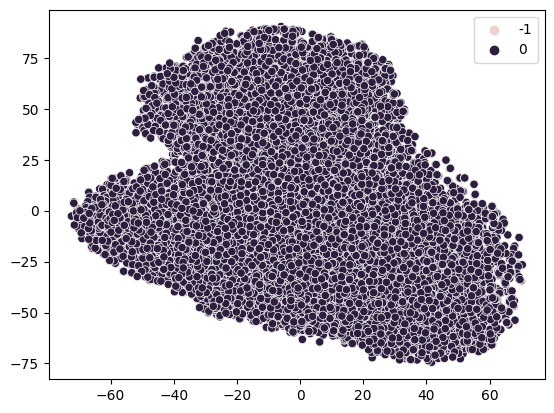

In [14]:
sns.scatterplot(x=V2[:,0], y=V2[:,1], hue=V3)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

U_transformed = LocallyLinearEmbedding(n_components=2).fit_transform(U)
U_transformed.shape

In [15]:
from sklearn.decomposition import PCA
V4 = PCA(n_components=2).fit_transform(V)
V4.shape

(17770, 2)

<Axes: >

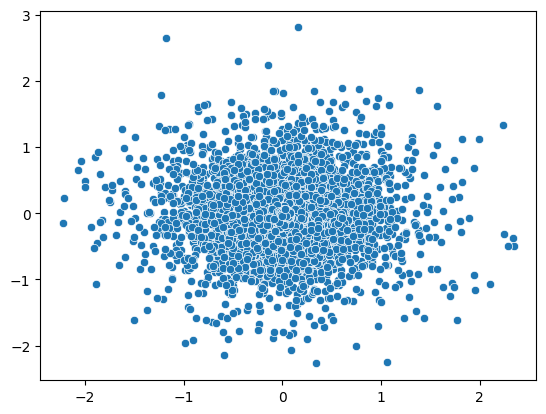

In [16]:
sns.scatterplot(x=V4[:,0], y=V4[:,1])